# Ukraine Russia War Twitter Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:\\tala\\resume\\filename.csv")
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10014 non-null  int64  
 1   conversation_id  10014 non-null  int64  
 2   created_at       10014 non-null  object 
 3   date             10014 non-null  object 
 4   time             10014 non-null  object 
 5   timezone         10014 non-null  int64  
 6   user_id          10014 non-null  int64  
 7   username         10014 non-null  object 
 8   name             10014 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10014 non-null  object 
 11  language         10014 non-null  object 
 12  mentions         10014 non-null  object 
 13  urls             10014 non-null  object 
 14  photos           10014 non-null  object 
 15  replies_count    10014 non-null  int64  
 16  retweets_count   10014 non-null  int64  
 17  likes_count 

# dealing with missing values

In [4]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10011
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9235
video                  0
thumbnail           8927
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

In [5]:
data=data.drop(["place","near","geo","source","user_rt_id","user_rt","retweet_id","retweet_date","translate","trans_src","trans_dest"], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               10014 non-null  int64 
 1   conversation_id  10014 non-null  int64 
 2   created_at       10014 non-null  object
 3   date             10014 non-null  object
 4   time             10014 non-null  object
 5   timezone         10014 non-null  int64 
 6   user_id          10014 non-null  int64 
 7   username         10014 non-null  object
 8   name             10014 non-null  object
 9   tweet            10014 non-null  object
 10  language         10014 non-null  object
 11  mentions         10014 non-null  object
 12  urls             10014 non-null  object
 13  photos           10014 non-null  object
 14  replies_count    10014 non-null  int64 
 15  retweets_count   10014 non-null  int64 
 16  likes_count      10014 non-null  int64 
 17  hashtags         10014 non-null

In [7]:
data["quote_url"].value_counts()

https://twitter.com/Gerashchenko_en/status/1630332836543700997    6
https://twitter.com/Gerashchenko_en/status/1630209935974834176    5
https://twitter.com/Inhumansoflate1/status/1629929701316898816    4
https://twitter.com/ricwe123/status/1630133513415450625           4
https://twitter.com/Roger_Moorhouse/status/1630237930257256448    4
                                                                 ..
https://twitter.com/eucouncil/status/1629461458298847232          1
https://twitter.com/eurofootcom/status/1630222745299562499        1
https://twitter.com/endgameww3/status/1630327431507718144         1
https://twitter.com/nomorwhitey/status/1623431896498675723        1
https://twitter.com/krus_stern/status/1630300213012320260         1
Name: quote_url, Length: 699, dtype: int64

In [8]:
data=data.drop(["quote_url"], axis=1)

In [9]:
data["thumbnail"].value_counts()

https://pbs.twimg.com/media/FqAnSzNaUAE8pM7.png                                             2
https://pbs.twimg.com/ext_tw_video_thumb/1630345455035899905/pu/img/Ng_tb4GIgSfOcGxo.jpg    2
https://pbs.twimg.com/ext_tw_video_thumb/1630339551972433920/pu/img/EcptxAI_E-3VRBdF.jpg    2
https://pbs.twimg.com/ext_tw_video_thumb/1630344438470922240/pu/img/5qSoLcLW972hIkLC.jpg    2
https://pbs.twimg.com/ext_tw_video_thumb/1630343682418245634/pu/img/WRVqakth4CvYIntF.jpg    2
                                                                                           ..
https://pbs.twimg.com/media/FqAtKoeX0AIuR0_.jpg                                             1
https://pbs.twimg.com/media/FqAtI5paEAAx7ba.jpg                                             1
https://pbs.twimg.com/media/FqAtJJLWwAAyuiu.jpg                                             1
https://pbs.twimg.com/media/FqAtFnaWwAMgj5y.jpg                                             1
https://pbs.twimg.com/media/FqAZgEdWwAAKfCZ.jpg             

In [10]:
data=data.drop(["thumbnail"], axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               10014 non-null  int64 
 1   conversation_id  10014 non-null  int64 
 2   created_at       10014 non-null  object
 3   date             10014 non-null  object
 4   time             10014 non-null  object
 5   timezone         10014 non-null  int64 
 6   user_id          10014 non-null  int64 
 7   username         10014 non-null  object
 8   name             10014 non-null  object
 9   tweet            10014 non-null  object
 10  language         10014 non-null  object
 11  mentions         10014 non-null  object
 12  urls             10014 non-null  object
 13  photos           10014 non-null  object
 14  replies_count    10014 non-null  int64 
 15  retweets_count   10014 non-null  int64 
 16  likes_count      10014 non-null  int64 
 17  hashtags         10014 non-null

In [12]:
data.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,...,[],0,0,0,[],[],https://twitter.com/TomasLiptai/status/1630366...,False,0,"[{'screen_name': 'nazijaeger__', 'name': 'nazi..."


In [13]:
data["reply_to"].nunique()

4257

In [14]:
data=data.drop(["id","conversation_id","user_id","name","photos","link","reply_to"] , axis=1)

In [15]:
data.head(1)

,created_at,date,time,timezone,username,tweet,language,mentions,urls,replies_count,retweets_count,likes_count,hashtags,cashtags,retweet,video
0,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en,[],[],0,0,0,[],[],False,0


In [16]:
data=data.drop(["video"] , axis=1)

In [17]:
data

,created_at,date,time,timezone,username,tweet,language,mentions,urls,replies_count,retweets_count,likes_count,hashtags,cashtags,retweet
0,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en,[],[],0,0,0,[],[],False
1,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,paperfloure,The Russia HAARP which could destroy USA in on...,en,[],['https://reality-choice.org/177/sura-the-russ...,0,0,0,[],[],False
2,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en,[],['https://thehill.com/blogs/in-the-know/387609...,0,0,0,[],[],False
3,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en,[],[],0,0,0,[],[],False
4,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en,[],[],0,0,0,[],[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,2023-02-27 22:16:41 UTC,2023-02-27,22:16:41,0,ahk14061,@wallacemick Its not Ukraine which investere w...,en,[],[],0,0,0,[],[],False
10010,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,marxistswon,@tom_username_ There were very dark rumors tha...,en,[],[],0,0,0,[],[],False
10011,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,johngerver21,@elonmusk If Russia lose the Rothschild are co...,en,[],[],0,0,0,[],[],False
10012,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,late49er,@RonFilipkowski Look forward to Russia liberat...,en,[],[],0,0,0,[],[],False


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      10014 non-null  object
 1   date            10014 non-null  object
 2   time            10014 non-null  object
 3   timezone        10014 non-null  int64 
 4   username        10014 non-null  object
 5   tweet           10014 non-null  object
 6   language        10014 non-null  object
 7   mentions        10014 non-null  object
 8   urls            10014 non-null  object
 9   replies_count   10014 non-null  int64 
 10  retweets_count  10014 non-null  int64 
 11  likes_count     10014 non-null  int64 
 12  hashtags        10014 non-null  object
 13  cashtags        10014 non-null  object
 14  retweet         10014 non-null  bool  
dtypes: bool(1), int64(4), object(10)
memory usage: 1.1+ MB


In [19]:
data["mentions"].nunique()

338

In [20]:
data=data.drop(["mentions","urls"] , axis=1)

In [21]:
data["cashtags"].value_counts()

[]                                              10011
['pm', 'pep', 'mkh']                                1
['ftx']                                             1
['fro', 'eurn', 'insw', 'nat', 'tnk', 'dht']        1
Name: cashtags, dtype: int64

In [22]:
data=data.drop(["cashtags"] , axis=1)

In [23]:
data["hashtags"].nunique()

746

In [24]:
data=data.drop(["hashtags"] , axis=1)

<AxesSubplot:xlabel='likes_count', ylabel='Density'>

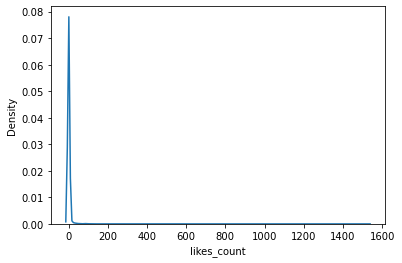

In [25]:
sns.kdeplot(data["likes_count"])

In [26]:
data=data.drop(["likes_count"] , axis=1)

<AxesSubplot:xlabel='retweets_count', ylabel='Density'>

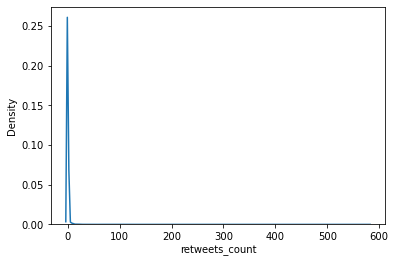

In [27]:
sns.kdeplot(data["retweets_count"])

In [28]:
data=data.drop(["retweets_count"] , axis=1)

<AxesSubplot:xlabel='replies_count', ylabel='Density'>

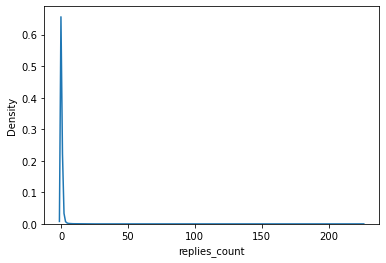

In [29]:
sns.kdeplot(data["replies_count"])

In [30]:
data=data.drop(["replies_count"] , axis=1)

In [31]:
data.head()

,created_at,date,time,timezone,username,tweet,language,retweet
0,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en,False
1,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,paperfloure,The Russia HAARP which could destroy USA in on...,en,False
2,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en,False
3,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en,False
4,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en,False


In [32]:
data=data.drop(["created_at","date","time","timezone"], axis=1)

In [33]:
data["retweet"].value_counts()

False    10014
Name: retweet, dtype: int64

In [34]:
data=data.drop(["retweet"], axis=1)

In [35]:
data.head()

,username,tweet,language
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en
1,paperfloure,The Russia HAARP which could destroy USA in on...,en
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en


In [36]:
data["language"].value_counts()

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: language, dtype: int64

In [41]:
#removing all the links, punctuation, symbols and other language errors from the tweets

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Science
[nltk_data]     Pillar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


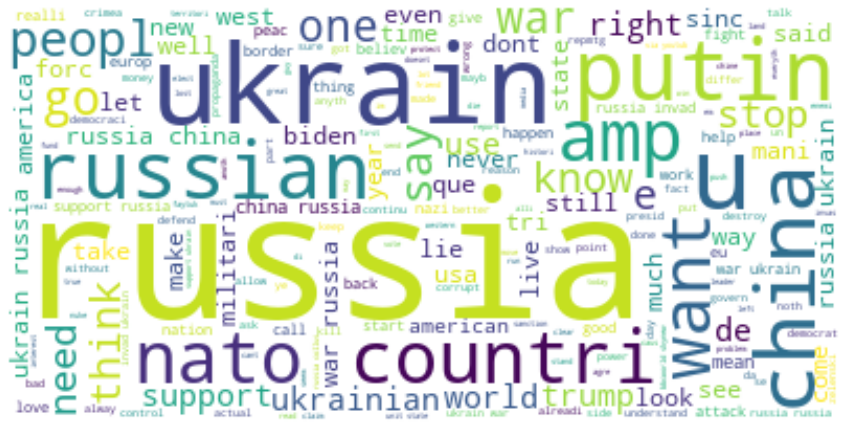

In [47]:
#showing the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
#adding three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Science
[nltk_data]     Pillar\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0      nazijaeg derwen  russia place satan rule well     0.259     0.000   
1  russia haarp could destroy usa one fell swoop ...     0.000     0.280   
2       putin give steven seagal  order friendship       0.367     0.000   
3       mainelif baddcompani it alway project russia     0.000     0.000   
4  pottingpink mfarussia modrussia milhistrf muze...     0.068     0.078   

   Neutral  
0    0.741  
1    0.720  
2    0.633  
3    1.000  
4    0.854  


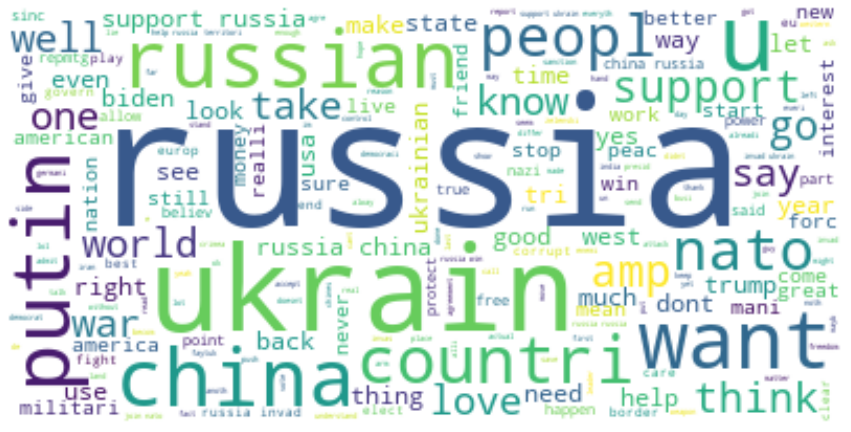

In [49]:
#the most frequent words used by people with positive sentiments
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

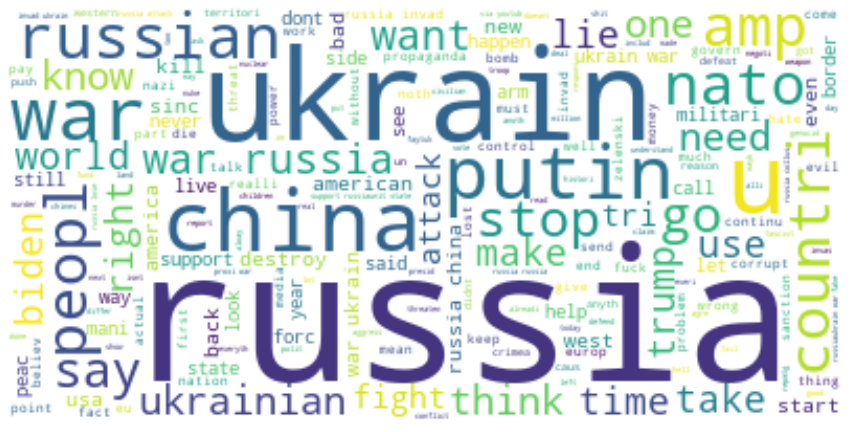

In [51]:
# the most frequent words used by people with negative sentiments:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()